In [1]:

import numpy as np
from math import sqrt
from math import ceil
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler,MaxAbsScaler
from sklearn.compose import ColumnTransformer

In [2]:
from scipy.signal import butter, lfilter
from sklearn.base import BaseEstimator, TransformerMixin

class BandpassFilter(BaseEstimator, TransformerMixin):
    def __init__(self, low_freq, high_freq, fs, order=5):
        self.low_freq = low_freq
        self.high_freq = high_freq
        self.fs = fs
        self.order = order
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Design the bandpass filter
        nyquist = 0.5 * self.fs
        low = self.low_freq / nyquist
        high = self.high_freq / nyquist
        b, a = butter(self.order, [low, high], btype='band')

        # Apply the bandpass filter
        return lfilter(b, a, X)

# Example usage:
bandpass_filter = BandpassFilter(low_freq=1, high_freq=5, fs=160, order=5)




In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
import pywt

class WaveletTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, wavelet='db1'):
        self.wavelet = wavelet

    def fit(self, X, y=None):
        # Wavelet transform does not require fitting, as it is not learning from the data
        return self

    def transform(self, X):
        # Perform discrete wavelet transform row-wise
        transformed = [pywt.wavedec(x, self.wavelet) for x in X]
        # Return the wavelet coefficients in a format that you need
        # This might involve concatenating coefficients or selecting specific ones
        # You might need to handle this based on the structure of your data
        return transformed

# Create an instance of the custom transformer
wavelet_transformer = WaveletTransformer()





In [4]:
fish_data = pd.read_csv("../data/DatasetClusters/fishes/fish02/fish_02_mts.csv")
fish_data_s1 = pd.read_csv("../data/DatasetClusters/fishes/fish02/s1/s1_mts.csv")
fish_data_s2 = pd.read_csv("../data/DatasetClusters/fishes/fish02/s2/s2_mts.csv")

In [5]:
fish_data

,cluster_1_red_s1,cluster_2_red_s1,cluster_3_red_s1,cluster_4_red_s1,cluster_5_red_s1,cluster_6_red_s1,cluster_7_red_s1,cluster_8_red_s1,cluster_1_green_s1,cluster_2_green_s1,...,cluster_3_green_s2,cluster_4_green_s2,cluster_5_green_s2,cluster_6_green_s2,cluster_7_green_s2,cluster_8_green_s2,cluster_9_green_s2,cluster_10_green_s2,cluster_11_green_s2,cluster_12_green_s2
0,-0.465304,-0.039182,-0.145111,-0.820533,-0.043201,0.065635,-0.133898,-1.221447,0.030856,0.054824,...,-1.189544,-0.075210,-0.147581,0.185621,-0.060962,-0.473671,0.185250,0.030095,-0.209130,-0.144704
1,-0.360442,0.565558,-0.029222,-0.730112,0.269952,0.325601,-0.065495,-0.490533,-0.013391,0.069814,...,-0.395168,-0.056063,-0.006011,0.487558,-0.075057,-0.169431,0.217182,0.116141,-0.176625,0.107027
2,-0.204723,0.364503,0.119252,-0.529757,-0.244755,0.430598,0.164129,-0.567888,0.055926,0.025640,...,-0.048424,-0.048751,0.055521,0.295386,-0.042303,-0.181962,-0.048547,0.121210,-0.249625,0.125422
3,0.062240,0.274655,-0.139845,-0.408598,-0.201634,0.225573,-0.259828,-0.356369,-0.027593,0.141087,...,-0.474683,-0.127960,0.069146,0.442235,-0.217588,-0.262486,0.504183,0.332504,-0.223825,-0.148232
4,-0.331344,0.372020,0.076066,-0.736249,-0.149454,0.482838,-0.297057,-0.240255,0.002930,0.113149,...,-0.634815,-0.091399,0.041809,-0.073000,-0.019247,-0.518799,0.294697,0.039957,-0.372642,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,-0.776604,-0.709191,0.198898,-0.416232,0.183228,-0.129994,-0.675661,-0.102535,0.145693,0.066204,...,-1.851342,0.175049,-0.142010,-0.974908,-0.414522,-0.456138,0.050827,-0.193651,-0.424621,0.389169
1027,-0.740787,-0.690548,0.037362,-0.570908,0.100399,-0.310062,-0.334169,-0.667639,0.211966,0.029136,...,-1.479970,0.049355,-0.030024,-0.930895,-0.387339,-0.516276,-0.024889,-0.308469,-0.394260,0.269652
1028,-1.049494,-0.800837,0.240324,-0.657034,-0.188345,-0.117036,-0.609144,-0.770036,0.018852,0.047636,...,-1.947750,-0.099697,-0.141195,-0.890876,-0.282241,-0.895772,-0.009157,-0.551247,-0.579031,0.126761
1029,-0.939454,-0.660230,0.058730,-0.215216,0.011012,-0.073275,-0.749173,-0.605966,0.160901,0.074371,...,-1.799051,0.255089,-0.004100,-1.003566,-0.337831,-0.705154,-0.023417,-0.165208,-0.427929,0.236471


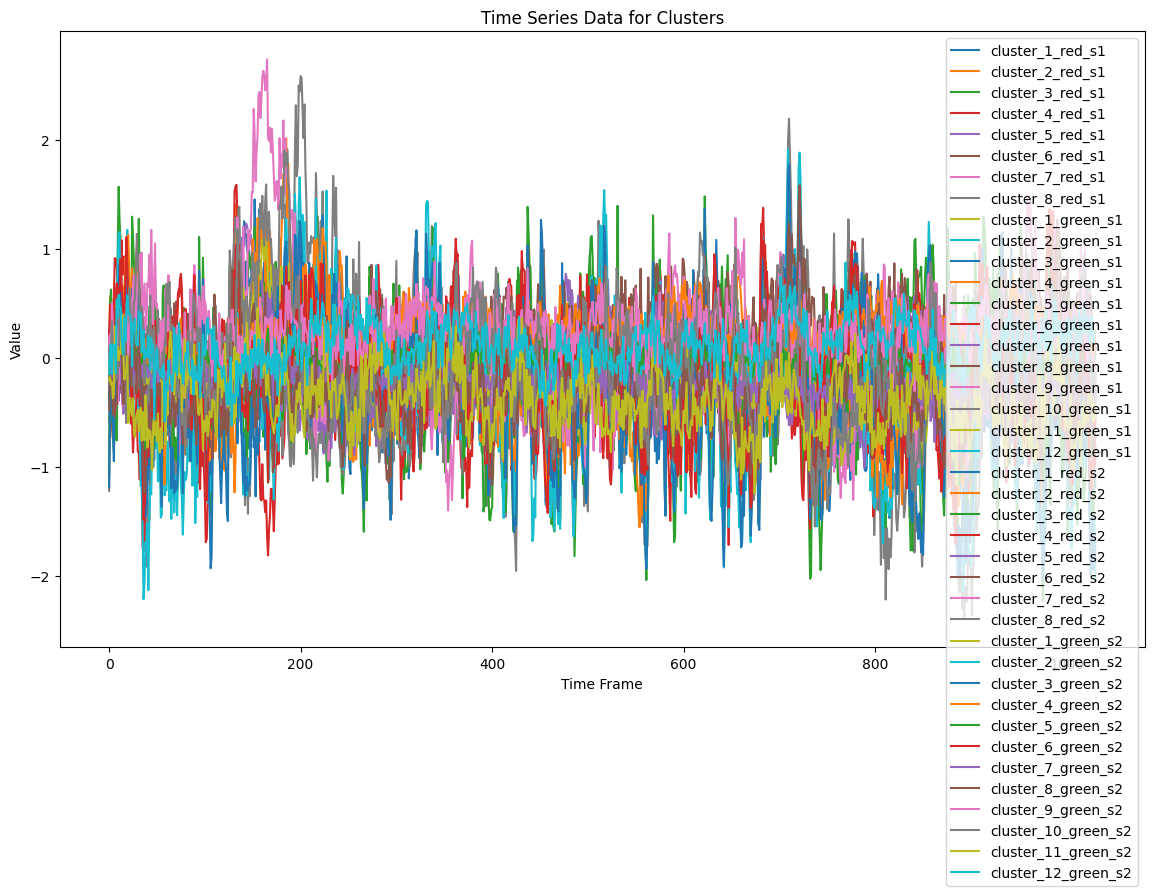

In [6]:

import matplotlib.pyplot as plt

# Plotting the time series data
plt.figure(figsize=(14, 8))  # Set the figure size for better readability

for column in fish_data.columns[0:]:
    plt.plot(fish_data.index, fish_data[column], label=column)

plt.title('Time Series Data for Clusters')
plt.xlabel('Time Frame')
plt.ylabel('Value')
plt.legend()
plt.show()


In [7]:
preprocessing_pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('scaler1', StandardScaler()),
])

data_preprocessed = preprocessing_pipeline.fit_transform(fish_data)

df_preprocessed = pd.DataFrame(data_preprocessed, columns=fish_data.columns, index=fish_data.index)

ValueError: Names provided are not unique: ['scaler1', 'scaler1']

In [ ]:
df_preprocessed

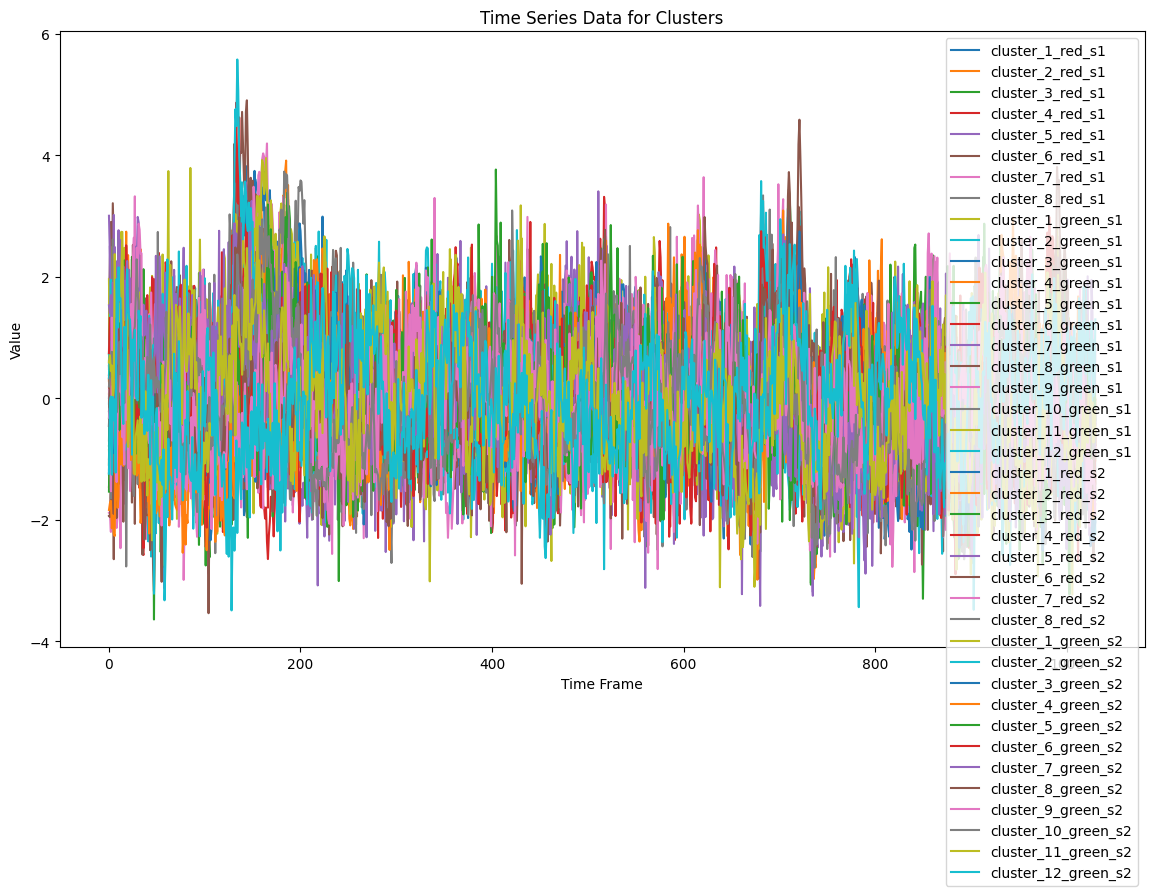

In [ ]:

import matplotlib.pyplot as plt

# Plotting the time series data
plt.figure(figsize=(14, 8))  # Set the figure size for better readability

for column in df_preprocessed.columns[0:]:
    plt.plot(df_preprocessed.index, df_preprocessed[column], label=column)

plt.title('Time Series Data for Clusters')
plt.xlabel('Time Frame')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
df_preprocessed.to_csv("../data/DatasetClusters/fishes/fish02/fish_02_scaled.csv",index=False)